# CellTypist Annotations - A tool for cell type annotation

Total common barcodes: 1232
Total filtered gene counts (post-remove): 4282363
Max GT counts (k=12): 13973.0


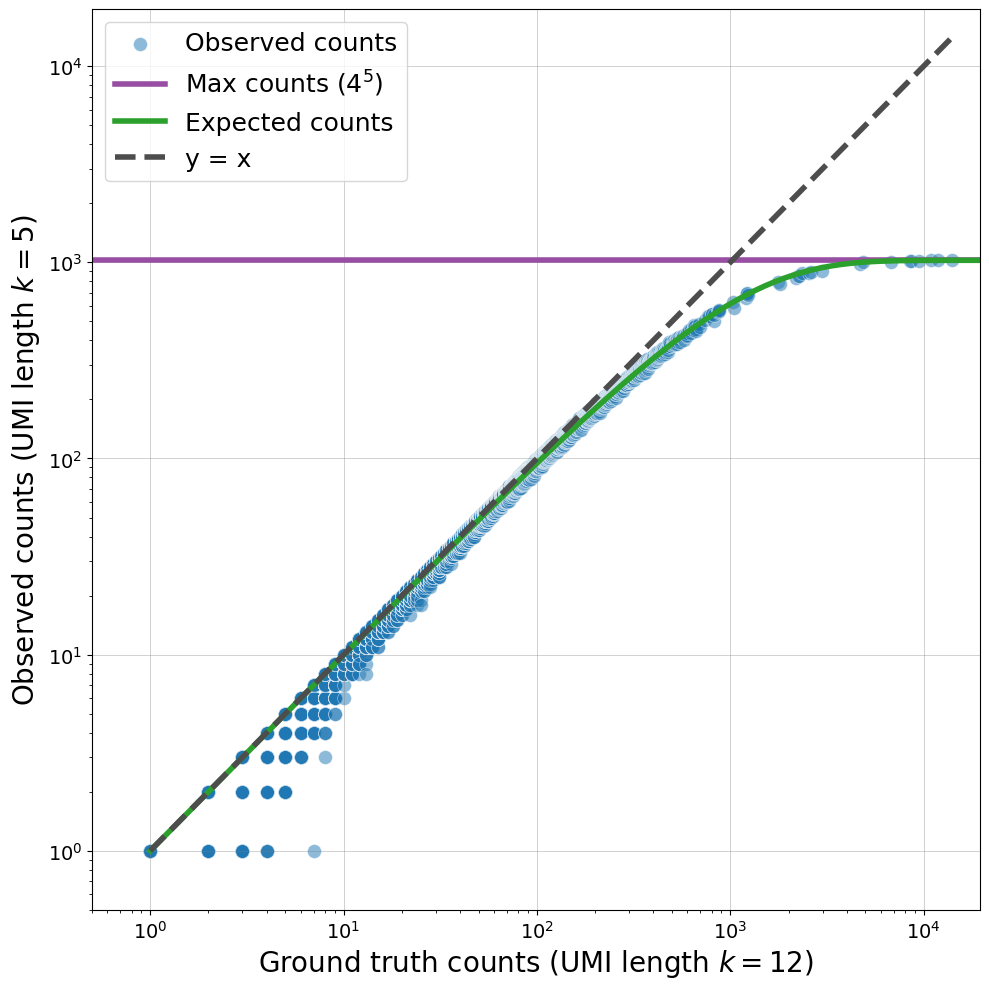

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import scipy.sparse as sp
from umi_utils import non_unif_forward_model
import pandas as pd



# Define which genes to remove
remove = np.array([
    "MALAT1",
    # add any other gene names you want to drop here
])

dataset = "1k_PBMCs"  # Change to "1k_PBMCs" if needed

adata_dict = {}
adata_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"

# --- Load only what you actually use (i=12, j=5) ---
i = 12
j = 5
adata_dict[i] = sc.read_h5ad(f"{adata_path}/adata_{i}.h5ad")
adata_dict[j] = sc.read_h5ad(f"{adata_path}/adata_{j}.h5ad")


umi_prob_dict = {}
for i in range(1, 13):
    umi_prob_dict[i] = pd.read_csv(f"/data/dagyeman/cellranger/bam_file_analysis/data/umi_probs/umi_probs_{i}.csv")

umi_probs = umi_prob_dict[j]["prob"]


# Align barcodes
common_barcodes = sorted(
    set(adata_dict[i].obs_names).intersection(set(adata_dict[j].obs_names))
)
print(f"Total common barcodes: {len(common_barcodes)}")

indices_i = adata_dict[i].obs_names.get_indexer(common_barcodes)
indices_j = adata_dict[j].obs_names.get_indexer(common_barcodes)

# Gene mask
gene_mask = ~np.isin(adata_dict[i].var_names, remove)

X_i = adata_dict[i].X[indices_i][:, gene_mask]
X_j = adata_dict[j].X[indices_j][:, gene_mask]

# ---------- FILTER (simplified) ----------
# Keep only pairs with X_i >= 1 (no filter on X_j)
X_i = np.asarray(X_i.todense() if sp.issparse(X_i) else X_i)
X_j = np.asarray(X_j.todense() if sp.issparse(X_j) else X_j)

mask = (X_i >= 1)
filtered_counts_i = X_i[mask]
filtered_counts_j = X_j[mask]

all_gene_counts_i = np.array(filtered_counts_i)
all_gene_counts_j = np.array(filtered_counts_j)

print(f"Total filtered gene counts (post-remove): {len(all_gene_counts_i)}")

# Sort by GT counts and apply the same order to observed counts
sorted_indices = np.argsort(all_gene_counts_i)
sorted_gene_counts_i = all_gene_counts_i[sorted_indices]
sorted_gene_counts_j = all_gene_counts_j[sorted_indices]
print("Max GT counts (k=12):", sorted_gene_counts_i.max())
# Plot
plt.figure(figsize=(10, 10))
plt.scatter(
    sorted_gene_counts_i, 
    sorted_gene_counts_j, 
    alpha=0.5, 
    c='#1f77b4',
    edgecolors='w', 
    s=100,
    linewidth=0.5, 
    label='Observed counts'
)

y_asymptotic_value = 4**j
plt.axhline(
    y=y_asymptotic_value, 
    color='#984ea3', 
    linestyle='-', 
    linewidth=4, 
    label=f'Max counts ($4^{{{j}}}$)'
)

# --- Forward model line: expected observed counts vs true counts n ---
# Avoid broadcasting error by evaluating the JIT function per-scalar n and stacking.
probs = umi_probs.values.astype(float)
sv = 1.4
n_values = np.logspace(0, np.log(sorted_gene_counts_i.max()*sv), 200)
n_values = n_values.astype(float)
model_vals = np.array([non_unif_forward_model(float(n), probs, 4**j) for n in n_values])

plt.plot(
    n_values, 
    model_vals, 
    color='#2ca02c',
    linewidth=4, 
    label='Expected counts'
)

max_val = sorted_gene_counts_i.max()
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=4, label='y = x')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0.5, max_val*sv)
plt.ylim(0.5, max_val*sv)
plt.ylabel(r"Observed counts (UMI length $k=5$)", fontsize=20)
plt.xlabel(r"Ground truth counts (UMI length $k=12$)", fontsize=20)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(loc="upper left", fontsize=18)

plt.tight_layout()
plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/figures/{dataset}/{dataset}_obs_vs_gt_counts.jpeg", dpi=300)
plt.show()
plt.close()

## All genes, All cells

###  Naive Method

Processing UMI length: 1


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model
🧬 3377 features used for prediction


Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.75858657 0.         0.        ]
 [0.         0.         1.98234965 1.98234965 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.339187983916088


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_1.h5ad



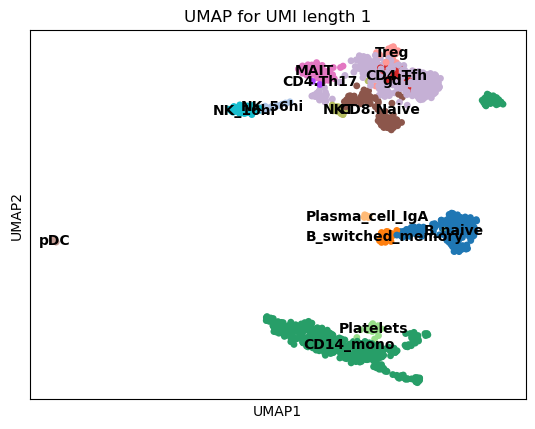

Processing UMI length: 2


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model
🧬 3377 features used for prediction


Sample of the matrix for UMI length 2:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.88963086 0.         0.        ]
 [0.         0.         1.81785399 1.81785399 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.856182134112137


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_2.h5ad



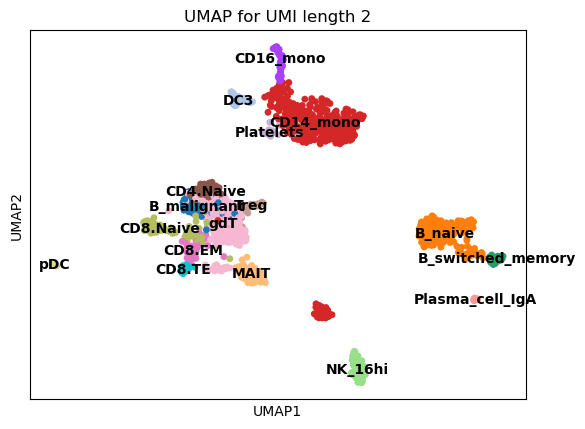

Processing UMI length: 3


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 3:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.77203496 0.         0.        ]
 [0.         0.         1.73704846 1.73704846 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.091091211753842


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_3.h5ad



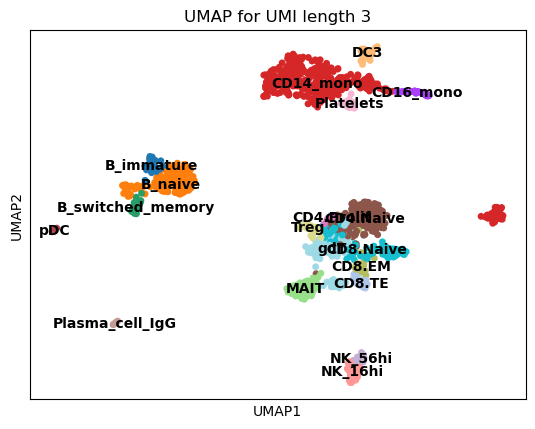

Processing UMI length: 4


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71871507 0.         0.        ]
 [0.         0.         1.70244058 1.70244058 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.384202821527866


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_4.h5ad



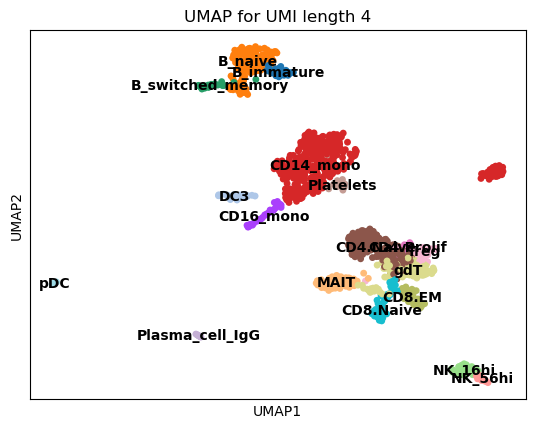

Processing UMI length: 5


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.69932847 0.         0.        ]
 [0.         0.         1.68845536 1.68845536 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.53055826603421


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_5.h5ad



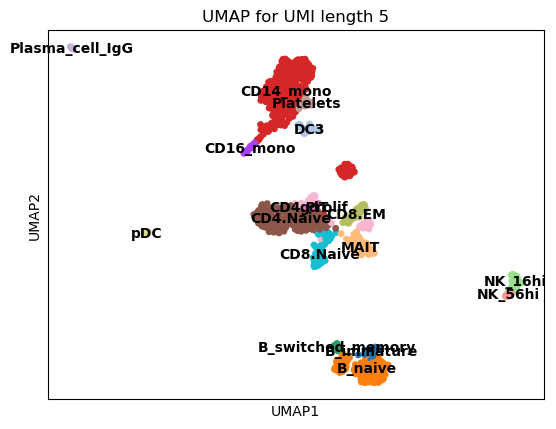

Processing UMI length: 6


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.69181976 0.         0.        ]
 [0.         0.         1.68451118 1.68451118 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58032586812956


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_6.h5ad



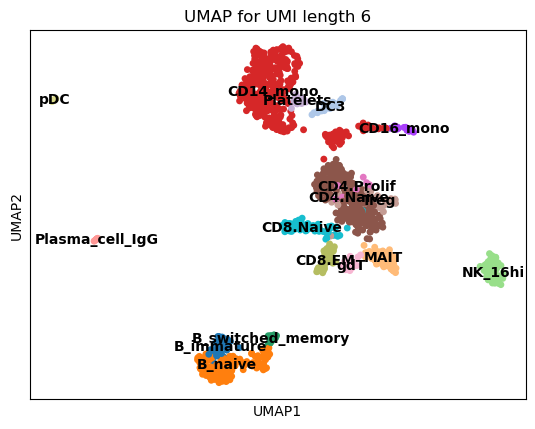

Processing UMI length: 7


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68989523 0.         0.        ]
 [0.         0.         1.68254754 1.68254754 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.591134130220313


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_7.h5ad



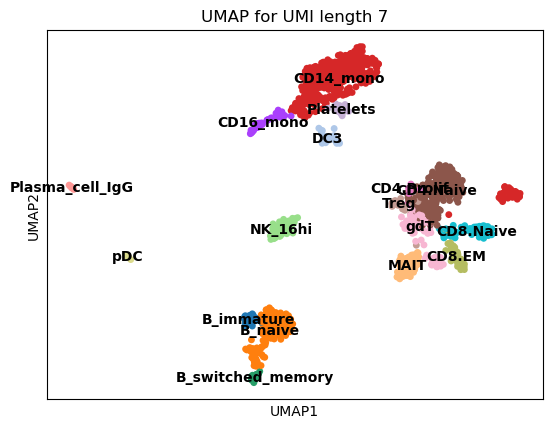

Processing UMI length: 8


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 8:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68857523 0.         0.        ]
 [0.         0.         1.68219112 1.68219112 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.587106699778493


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_8.h5ad



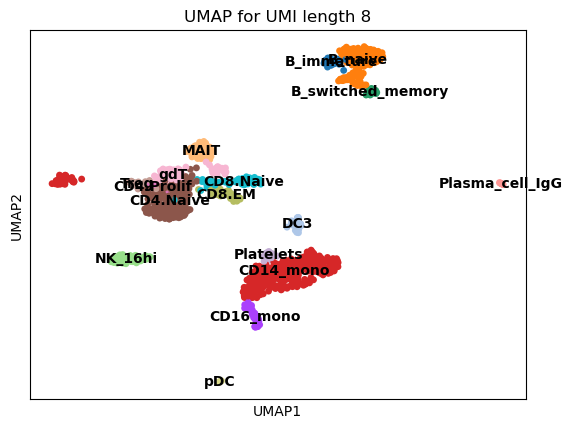

Processing UMI length: 9


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68761682 0.         0.        ]
 [0.         0.         1.68112297 1.68112297 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.585883686303646


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_9.h5ad



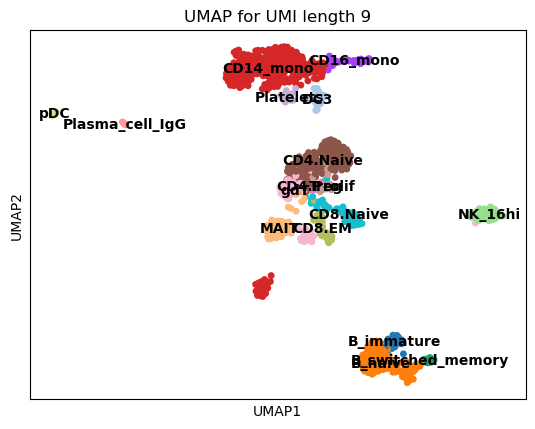

Processing UMI length: 10


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model
🧬 3377 features used for prediction


Sample of the matrix for UMI length 10:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68689889 0.         0.        ]
 [0.         0.         1.68005647 1.68005647 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58466216732117


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_10.h5ad



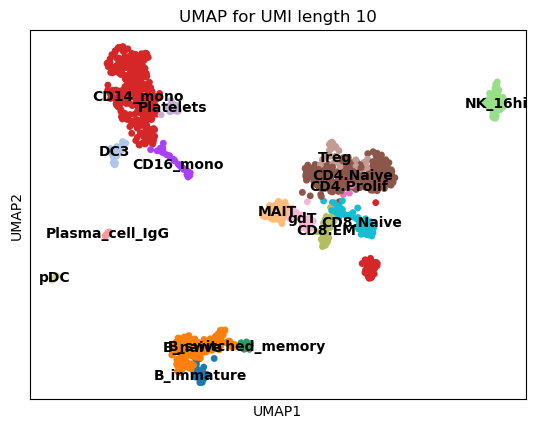

Processing UMI length: 11


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.6861817  0.         0.        ]
 [0.         0.         1.67952385 1.67952385 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58466216732117


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_11.h5ad



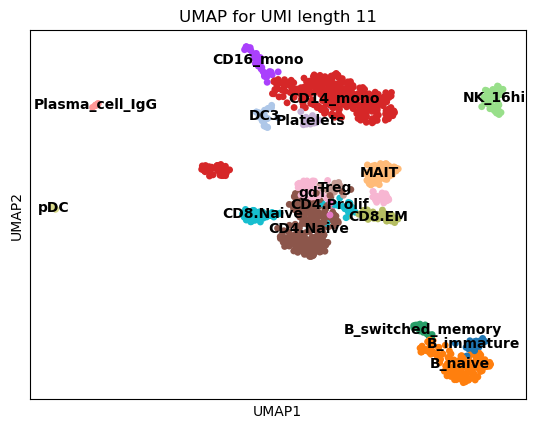

Processing UMI length: 12


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 12:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68582339 0.         0.        ]
 [0.         0.         1.6793464  1.6793464  0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58466216732117


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad



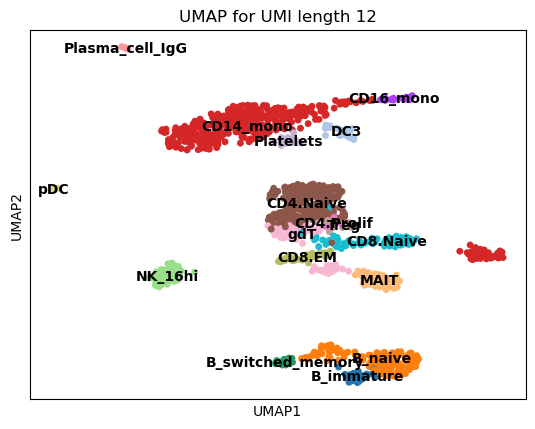

In [2]:
import scanpy as sc
import celltypist
import os

dataset= "1k_PBMCs"  # Change to "10k_PBMCs" if needed

common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"
# common_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices"
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_adata_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # Compute UMAP
    sc.tl.umap(annotated_adata)

    # Plot UMAP with majority voting labels
    sc.pl.umap(
        annotated_adata, 
        color=['majority_voting'], 
        legend_loc='on data', 
        title=f"UMAP for UMI length {i}", 
        show=True  # Display instead of saving
    )

###  Methods of Moments Estimator 

In [3]:
import scanpy as sc
import celltypist
import os

dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed
common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/col_aware_nunif_matrices" # 1k

# Define file paths
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_inv_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # Compute UMAP
    # sc.tl.umap(annotated_adata)

    # # Plot UMAP with majority voting labels
    # sc.pl.umap(
    #     annotated_adata, 
    #     color=['majority_voting'], 
    #     legend_loc='on data', 
    #     title=f"UMAP for UMI length {i}(inverted)", 
    #     show=True  # Display instead of saving
    # )

Processing UMI length: 1


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71275466 0.         0.        ]
 [0.         0.         1.96977533 1.96977533 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.646527808042398


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_1.h5ad

Processing UMI length: 2


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 2:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.76168012 0.         0.        ]
 [0.         0.         1.73146049 1.73146049 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.040322759768344


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_2.h5ad

Processing UMI length: 3


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 3:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.69470588 0.         0.        ]
 [0.         0.         1.7001125  1.7001125  0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.42178787770164


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_3.h5ad

Processing UMI length: 4


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.69180773 0.         0.        ]
 [0.         0.         1.68909126 1.68909126 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.588980249672082


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_4.h5ad

Processing UMI length: 5


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.69168243 0.         0.        ]
 [0.         0.         1.68430722 1.68430722 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.591336158572577


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_5.h5ad

Processing UMI length: 6


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68969506 0.         0.        ]
 [0.         0.         1.68338701 1.68338701 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.596974237188222


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_6.h5ad

Processing UMI length: 7


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.6893443  0.         0.        ]
 [0.         0.         1.68225802 1.68225802 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.595440919863025


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_7.h5ad

Processing UMI length: 8


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 8:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.688433   0.         0.        ]
 [0.         0.         1.68211692 1.68211692 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.588203100134532


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_8.h5ad

Processing UMI length: 9


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model
🧬 3377 features used for prediction


Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.6875795  0.         0.        ]
 [0.         0.         1.68110373 1.68110373 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58616435172065


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_9.h5ad

Processing UMI length: 10


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 10:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.6868894  0.         0.        ]
 [0.         0.         1.68005049 1.68005049 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58473409042606


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_10.h5ad

Processing UMI length: 11


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68617588 0.         0.        ]
 [0.         0.         1.67954046 1.67954046 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.584680703938506


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_11.h5ad

Processing UMI length: 12


🔬 Input data has 1232 cells and 28226 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 12:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.68578063 0.         0.        ]
 [0.         0.         1.6794711  1.6794711  0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.584670875716961


🧬 3377 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_12.h5ad



### - Celltypist Error Plot  

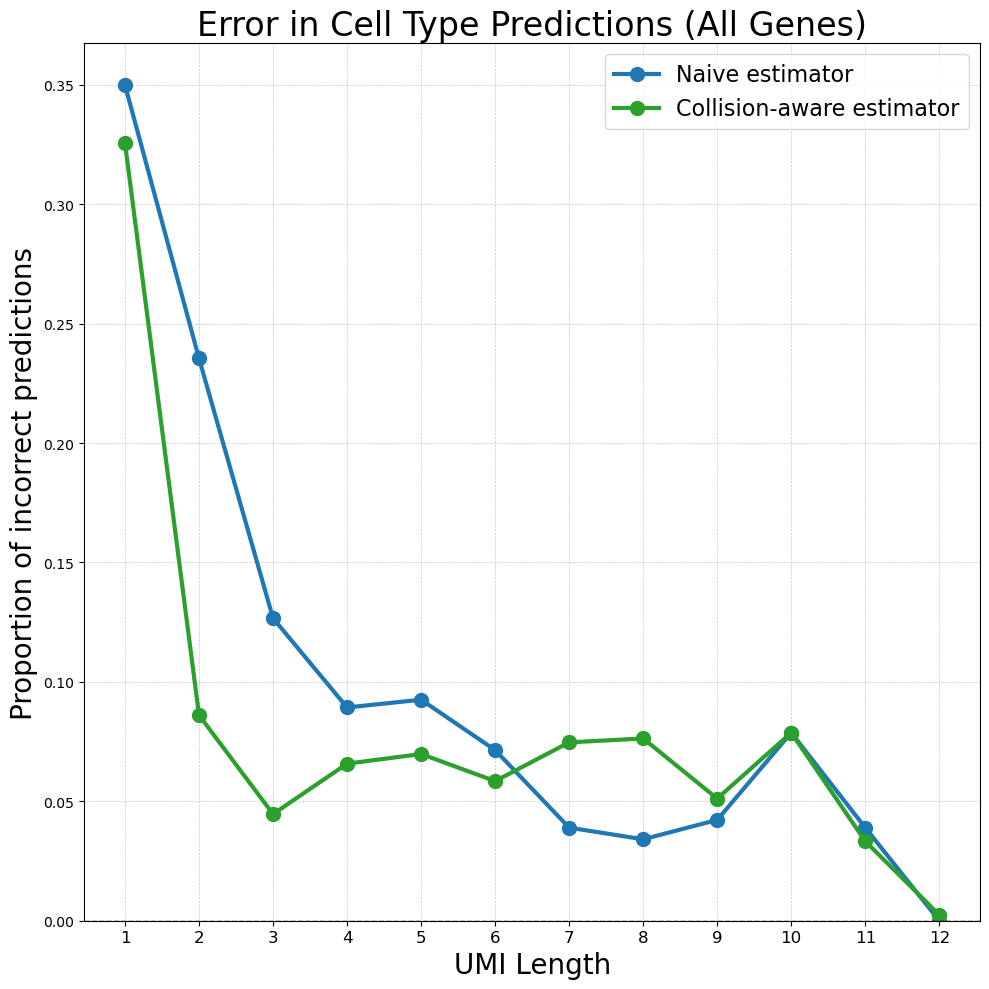

In [4]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Paths
regular_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices"
inverted_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices"

# 1) Load regular annotated adata matrices into a dict
annotated_ads_reg = {
    i: sc.read_h5ad(f"{regular_path}/annotated_adata_{i}.h5ad")
    for i in range(1, 13)
}

# 2) Use UMI 12 as ground truth
ground_truth_adata = annotated_ads_reg[12]
common_cells = sorted(ground_truth_adata.obs_names)
ground_truth = ground_truth_adata.obs.loc[common_cells, 'majority_voting'].astype(str).values

# 3) Compute error vectors
error_vector_reg = np.zeros(12)
error_vector_inv = np.zeros(12)

for i in range(1, 13):
    # Regular predictions aligned to UMI 12
    ad_reg = annotated_ads_reg[i]
    present = [c for c in common_cells if c in ad_reg.obs_names]
    preds_reg = ad_reg.obs.loc[present, 'majority_voting'].astype(str).values
    true_aligned = ground_truth_adata.obs.loc[present, 'majority_voting'].astype(str).values
    error_vector_reg[i - 1] = np.mean(preds_reg != true_aligned)

    # Inverted predictions aligned to UMI 12
    ad_inv = sc.read_h5ad(f"{inverted_path}/annotated_adata_{i}.h5ad")
    present_inv = [c for c in common_cells if c in ad_inv.obs_names]
    preds_inv = ad_inv.obs.loc[present_inv, 'majority_voting'].astype(str).values
    true_aligned_inv = ground_truth_adata.obs.loc[present_inv, 'majority_voting'].astype(str).values
    error_vector_inv[i - 1] = np.mean(preds_inv != true_aligned_inv)

# 4) Plot both error curves
plt.figure(figsize=(10, 10))

# Blue for Naive (Regular)
plt.plot(
    range(1, 13), error_vector_reg, marker='o', linestyle='-',
    label='Naive estimator', markersize=10, linewidth=3, color='#1f77b4'
)

# Green for Collision-aware (Inverted)
plt.plot(
    range(1, 13), error_vector_inv, marker='o', linestyle='-',
    label='Collision-aware estimator', markersize=10, linewidth=3, color='#2ca02c'
)

plt.xlabel('UMI Length', fontsize=20)
plt.ylabel('Proportion of incorrect predictions', fontsize=20)
plt.ylim(bottom=0)
plt.xticks(range(1, 13), fontsize=12)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Error in Cell Type Predictions (All Genes)', fontsize=24)
plt.legend(fontsize=16)
plt.tight_layout()
# out_file = "/data/dagyeman/cellranger/bam_file_analysis/figures_ur/manuscript_figures/10k_PBMCs/10k_error_plot_consensus.pdf"
# os.makedirs(os.path.dirname(out_file), exist_ok=True)
# plt.savefig(out_file)
plt.show()


## All Cells, All Genes, No MALAT1 

### Naive Method 

In [5]:
import scanpy as sc
import celltypist
import os
import numpy as np

dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed
common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"
# common_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices"
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}

# Example remove array (replace with actual list of gene names)
remove = np.array(['MALAT1'])  

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    # Remove genes in the remove list
    adata = adata[:, ~np.in1d(adata.var_names, remove)].copy()
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_adata_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # # Compute UMAP
    # sc.tl.umap(annotated_adata)

    # # Plot UMAP with majority voting labels
    # sc.pl.umap(
    #     annotated_adata, 
    #     color=['majority_voting'], 
    #     legend_loc='on data', 
    #     title=f"UMAP for UMI length {i}", 
    #     show=True  # Display instead of saving
    # )


Processing UMI length: 1


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.75938232 0.         0.        ]
 [0.         0.         1.98342993 1.98342993 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.339187983916088


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_1.h5ad

Processing UMI length: 2


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 2:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.89217822 0.         0.        ]
 [0.         0.         1.82131911 1.82131911 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.856182134112137


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_2.h5ad

Processing UMI length: 3


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 3:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.78059725 0.         0.        ]
 [0.         0.         1.74714796 1.74714796 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.091091211753842


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_3.h5ad

Processing UMI length: 4


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model
🧬 3376 features used for prediction


Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.73955974 0.         0.        ]
 [0.         0.         1.722356   1.722356   0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.384202821527866


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_4.h5ad

Processing UMI length: 5


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72766303 0.         0.        ]
 [0.         0.         1.7150308  1.7150308  0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.53055826603421


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_5.h5ad

Processing UMI length: 6


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72399434 0.         0.        ]
 [0.         0.         1.71335127 1.71335127 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58032586812956


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_6.h5ad

Processing UMI length: 7


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.7228597  0.         0.        ]
 [0.         0.         1.71167579 1.71167579 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.591134130220313


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_7.h5ad

Processing UMI length: 8


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model
🧬 3376 features used for prediction


Sample of the matrix for UMI length 8:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.7217269  0.         0.        ]
 [0.         0.         1.71130401 1.71130401 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.587106699778493


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_8.h5ad

Processing UMI length: 9


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model
🧬 3376 features used for prediction


Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72134971 0.         0.        ]
 [0.         0.         1.71037543 1.71037543 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.585883686303646


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_9.h5ad

Processing UMI length: 10


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model
🧬 3376 features used for prediction


Sample of the matrix for UMI length 10:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72059593 0.         0.        ]
 [0.         0.         1.70926277 1.70926277 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58466216732117


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_10.h5ad

Processing UMI length: 11


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71984298 0.         0.        ]
 [0.         0.         1.70870711 1.70870711 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58466216732117


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_11.h5ad

Processing UMI length: 12


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model
🧬 3376 features used for prediction


Sample of the matrix for UMI length 12:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71946681 0.         0.        ]
 [0.         0.         1.70852199 1.70852199 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58466216732117


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad



### Method of Moments Estimator

In [6]:
import scanpy as sc
import celltypist
import os

dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed

common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/col_aware_nunif_matrices" # 1k
# common_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/inverted2_adata_matrices" # 10k
# Define file paths
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}


remove = np.array(['MALAT1'])  

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    adata = adata[:, ~np.in1d(adata.var_names, remove)].copy()
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_inv_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # Compute UMAP
    # sc.tl.umap(annotated_adata)

    # Plot UMAP with majority voting labels
    # sc.pl.umap(
    #     annotated_adata, 
    #     color=['majority_voting'], 
    #     legend_loc='on data', 
    #     title=f"UMAP for UMI length {i}(inverted)", 
    #     show=True  # Display instead of saving
    # )


Processing UMI length: 1


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71402407 0.         0.        ]
 [0.         0.         1.97158511 1.97158511 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.646527808042398


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_1.h5ad

Processing UMI length: 2


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 2:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.76954974 0.         0.        ]
 [0.         0.         1.74325139 1.74325139 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.040322759768344


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_2.h5ad

Processing UMI length: 3


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model
🧬 3376 features used for prediction


Sample of the matrix for UMI length 3:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.73191168 0.         0.        ]
 [0.         0.         1.72101708 1.72101708 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.42178787770164


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_3.h5ad

Processing UMI length: 4


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72579261 0.         0.        ]
 [0.         0.         1.71517749 1.71517749 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.588980249672082


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_4.h5ad

Processing UMI length: 5


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72400756 0.         0.        ]
 [0.         0.         1.71312622 1.71312622 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.591336158572577


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_5.h5ad

Processing UMI length: 6


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72304849 0.         0.        ]
 [0.         0.         1.71285905 1.71285905 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.596974237188222


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_6.h5ad

Processing UMI length: 7


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72261691 0.         0.        ]
 [0.         0.         1.71154901 1.71154901 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.595440919863025


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_7.h5ad

Processing UMI length: 8


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 8:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.7216642  0.         0.        ]
 [0.         0.         1.71127139 1.71127139 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.588203100134532


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_8.h5ad

Processing UMI length: 9


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72133354 0.         0.        ]
 [0.         0.         1.71036698 1.71036698 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58616435172065


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_9.h5ad

Processing UMI length: 10


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 10:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.72059183 0.         0.        ]
 [0.         0.         1.7092595  1.7092595  0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.58473409042606


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_10.h5ad

Processing UMI length: 11


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71983859 0.         0.        ]
 [0.         0.         1.70872463 1.70872463 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.584680703938506


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_11.h5ad

Processing UMI length: 12


🔬 Input data has 1232 cells and 28225 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 12:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.71942477 0.         0.        ]
 [0.         0.         1.70864862 1.70864862 0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.584670875716961


🧬 3376 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_12.h5ad



### Celltypist Error Plot

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.39448052 0.21590909 0.15422078 0.08603896 0.07548701 0.05357143
 0.0487013  0.05275974 0.0487013  0.01542208 0.05275974 0.05194805]
[0.3538961  0.12256494 0.06574675 0.05600649 0.04707792 0.05194805
 0.03165584 0.02922078 0.02353896 0.05113636 0.05275974 0.07548701]
0.913961038961039


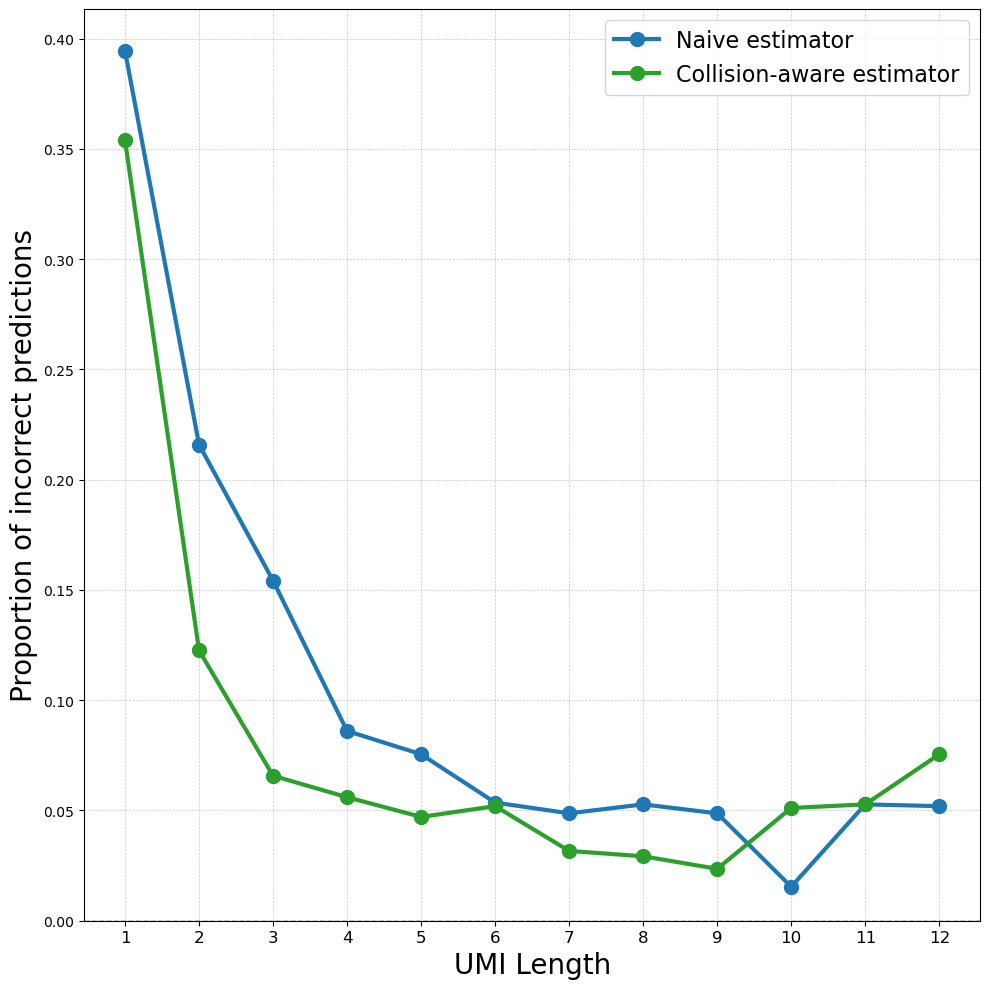

In [10]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed
# Paths
regular_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices"
inverted_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices"

# regular_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices"
# inverted_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices"

# 1) Load regular annotated adata matrices into a dict
annotated_ads_reg = {
    i: sc.read_h5ad(f"{regular_path}/annotated_adata_{i}.h5ad")
    for i in range(1, 13)
}

# 2) Use UMI 12 as ground truth
ground_truth_adata = annotated_ads_reg[12]
common_cells = sorted(ground_truth_adata.obs_names)
ground_truth = ground_truth_adata.obs.loc[common_cells, 'majority_voting'].astype(str).values
gt_labels = ground_truth_adata.obs['majority_voting'].astype(str).to_dict()

# 4) Compute error vectors
error_vector_reg = np.zeros(12)
error_vector_inv = np.zeros(12)
print(error_vector_reg)
print(error_vector_inv)

for i in range(1, 13):
    # Regular predictions aligned to consensus cells
    ad_reg = annotated_ads_reg[i]
    present = [c for c in common_cells if c in ad_reg.obs_names]
    preds_reg = ad_reg.obs.loc[present, 'majority_voting'].astype(str).values
    true_aligned = np.array([gt_labels[c] for c in present], dtype=str)
    error_vector_reg[i - 1] = np.mean(preds_reg != true_aligned)

    # Inverted predictions aligned to consensus cells
    ad_inv = sc.read_h5ad(f"{inverted_path}/annotated_adata_{i}.h5ad")
    present_inv = [c for c in common_cells if c in ad_inv.obs_names]
    preds_inv = ad_inv.obs.loc[present_inv, 'majority_voting'].astype(str).values
    true_aligned_inv = np.array([gt_labels[c] for c in present_inv], dtype=str)
    error_vector_inv[i - 1] = np.mean(preds_inv != true_aligned_inv)

print(error_vector_reg)
print(error_vector_inv)
print(1 - error_vector_reg[3])

# 5) Plot both error curves
plt.figure(figsize=(10, 10))

# Blue for Naive (Regular)
plt.plot(
    range(1, 13), error_vector_reg, marker='o', linestyle='-',
    label='Naive estimator', markersize=10, linewidth=3, color='#1f77b4'
)

# Green for Collision-aware (Inverted)
plt.plot(
    range(1, 13), error_vector_inv, marker='o', linestyle='-',
    label='Collision-aware estimator', markersize=10, linewidth=3, color='#2ca02c'
)

plt.xlabel('UMI Length', fontsize=20)
plt.ylabel('Proportion of incorrect predictions', fontsize=20)
plt.ylim(bottom=0)
plt.xticks(range(1, 13), fontsize=12)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
# plt.title('Error in Cell Type Predictions (All Genes, No MALAT1)', fontsize=24)
plt.legend(fontsize=16)
plt.tight_layout()
# out_file = f"/data/dagyeman/cellranger/bam_file_analysis/figures/{dataset}/{dataset}_cell_typist_error.pdf"
# os.makedirs(os.path.dirname(out_file), exist_ok=True)
plt.savefig(out_file)
plt.show()


## 2. 10k PBMCs

Processing UMI length: 1
Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.71062293 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model
🧬 3434 features used for prediction


Min: 0.0, Max: 6.1444351289000245


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/data/dagyeman/miniconda3/envs/af/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_1.h5ad



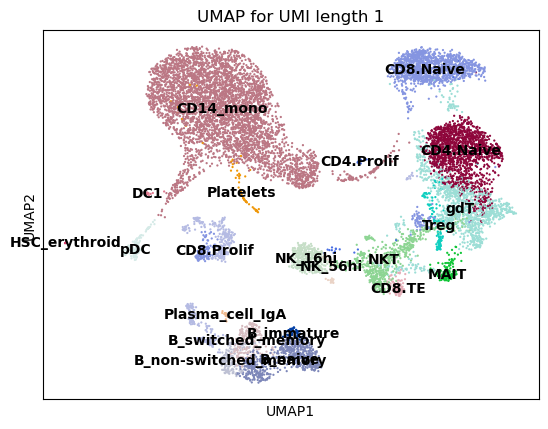

Processing UMI length: 2
Sample of the matrix for UMI length 2:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.43826224 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 6.706038685285139


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_2.h5ad



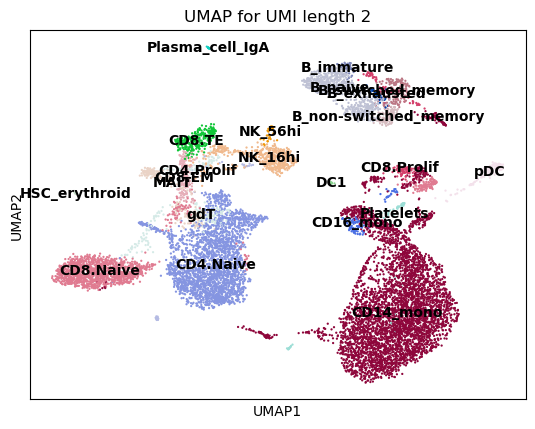

Processing UMI length: 3
Sample of the matrix for UMI length 3:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.27411886 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model
🧬 3434 features used for prediction


Min: 0.0, Max: 7.248612334521685


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_3.h5ad



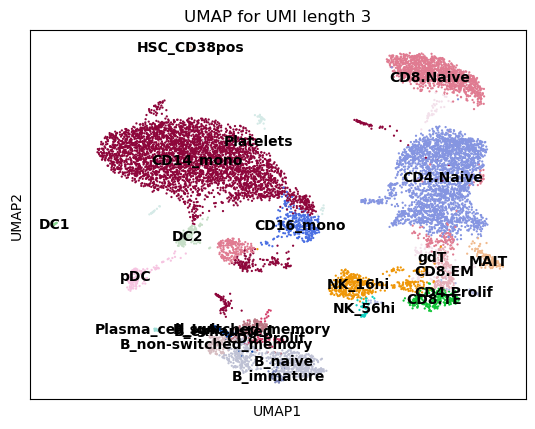

Processing UMI length: 4
Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.19754032 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 7.592178161580244


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_4.h5ad



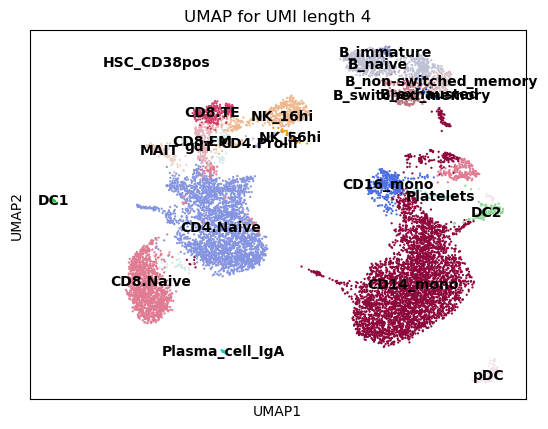

Processing UMI length: 5
Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.16823538 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 7.779068004598449


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_5.h5ad



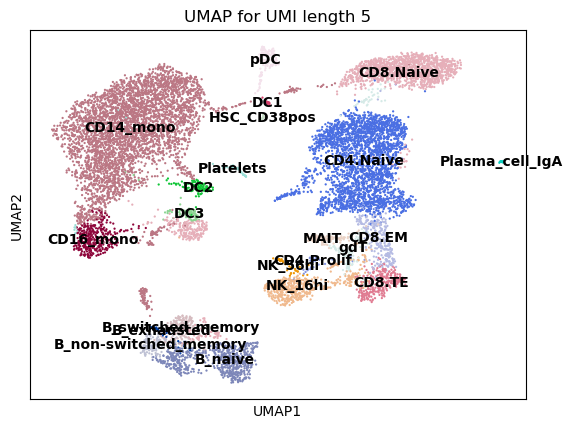

Processing UMI length: 6
Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15760242 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 7.825642340833762


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_6.h5ad



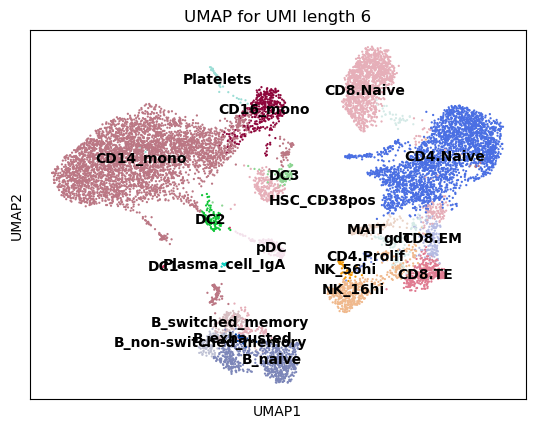

Processing UMI length: 7
Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15422127 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 7.96742771733859


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_7.h5ad



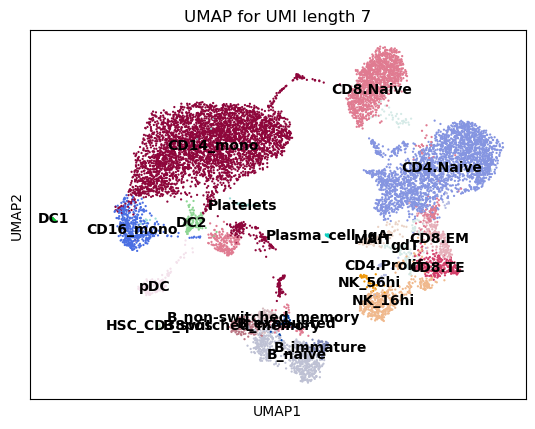

Processing UMI length: 8
Sample of the matrix for UMI length 8:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15278595 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 8.152624445496652


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_8.h5ad



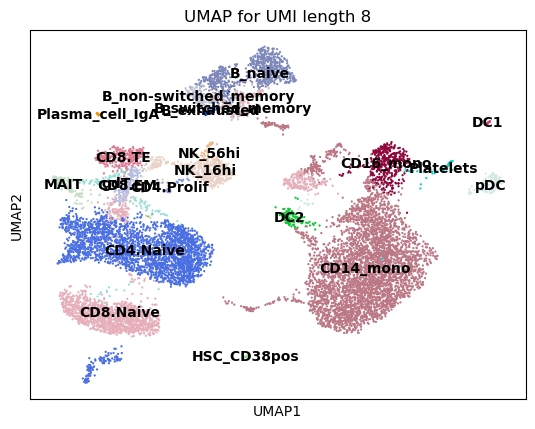

Processing UMI length: 9
Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15234132 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 8.205884594478329


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_9.h5ad



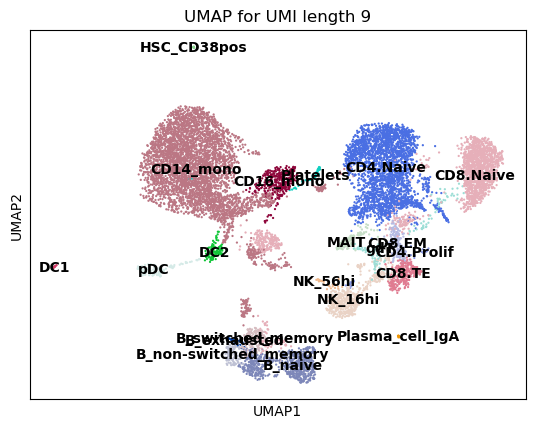

Processing UMI length: 10
Sample of the matrix for UMI length 10:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15189706 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 8.220844184974894


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_10.h5ad



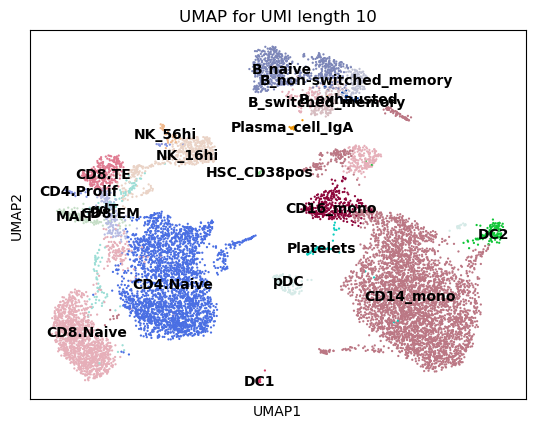

Processing UMI length: 11
Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15169973 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 8.222689352813175


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_11.h5ad



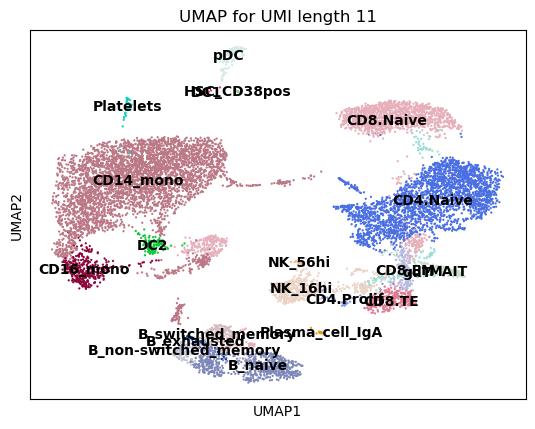

Processing UMI length: 12
Sample of the matrix for UMI length 12:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.15155179 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


🔬 Input data has 11458 cells and 33100 genes
🔗 Matching reference genes in the model


Min: 0.0, Max: 8.22204646150415


🧬 3434 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad



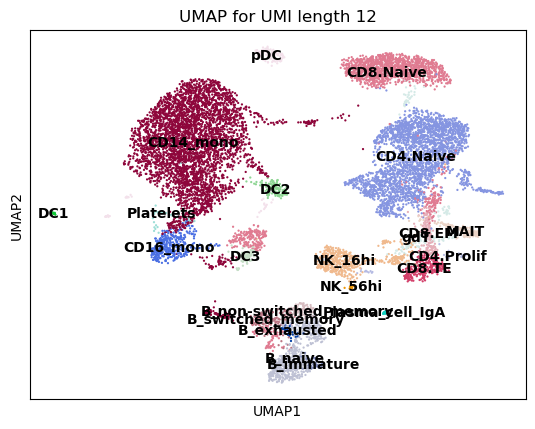

In [1]:
import scanpy as sc
import celltypist
import os
dataset = "10k_PBMCs"  # Change to "1k_PBMCs" if needed

common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"
# common_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices"
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_adata_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # Compute UMAP
    sc.tl.umap(annotated_adata)

    # Plot UMAP with majority voting labels
    sc.pl.umap(
        annotated_adata, 
        color=['majority_voting'], 
        legend_loc='on data', 
        title=f"UMAP for UMI length {i}", 
        show=True  # Display instead of saving
    )

## 5k PBMCs

### All genes, all cells

#### Naive Estimator

Processing UMI length: 1


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.95797982 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 6.294417930749521


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_1.h5ad



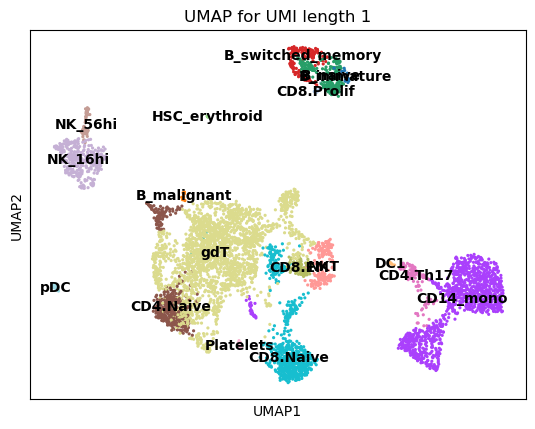

Processing UMI length: 2


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model
🧬 3430 features used for prediction


Sample of the matrix for UMI length 2:
[[0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.7647091 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]]
Min: 0.0, Max: 6.666083288249478


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_2.h5ad



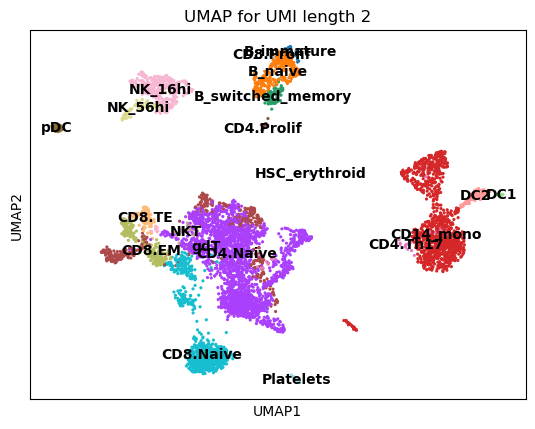

Processing UMI length: 3


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model
🧬 3430 features used for prediction


Sample of the matrix for UMI length 3:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.65545137 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.277097841543104


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_3.h5ad



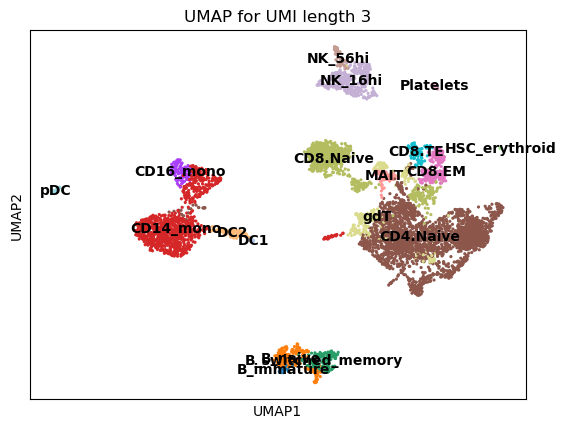

Processing UMI length: 4


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.59939572 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.812662716300867


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_4.h5ad



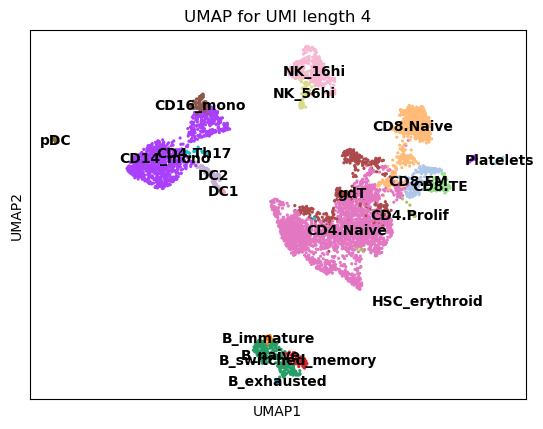

Processing UMI length: 5


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.57041111 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.228219319218242


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_5.h5ad



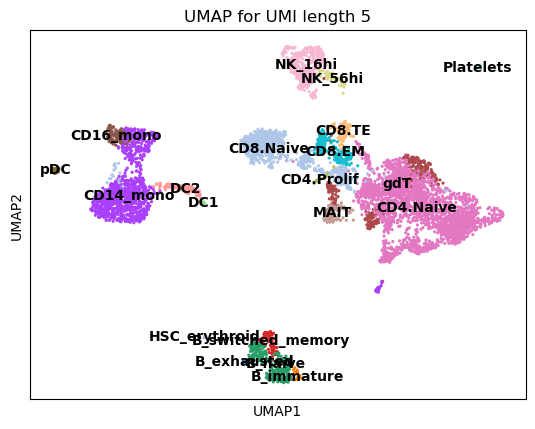

Processing UMI length: 6


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55959436 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.439603422922


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_6.h5ad



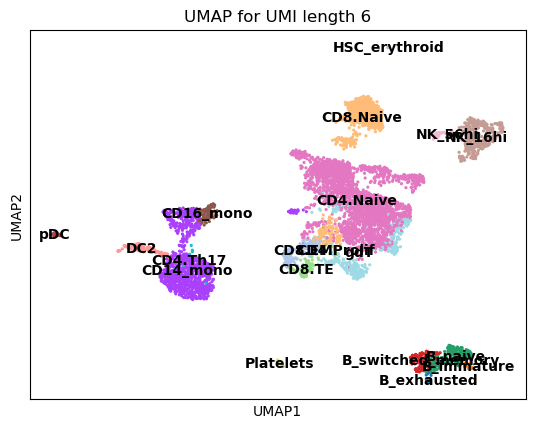

Processing UMI length: 7


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55589139 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.497952668536993


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_7.h5ad



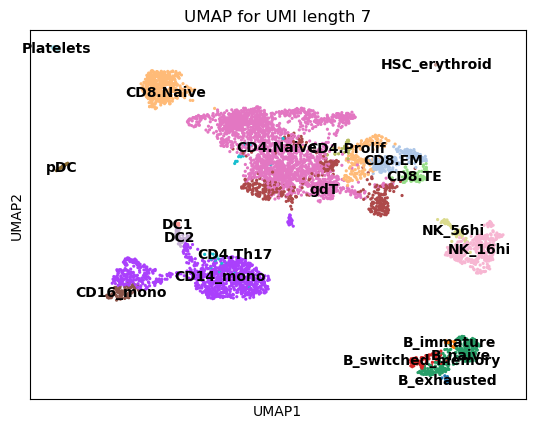

Processing UMI length: 8


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 8:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55478396 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.51563450805593


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_8.h5ad



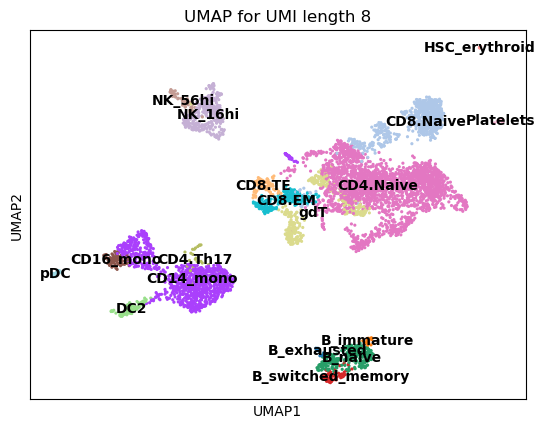

Processing UMI length: 9


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55449993 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.519574713322934


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_9.h5ad



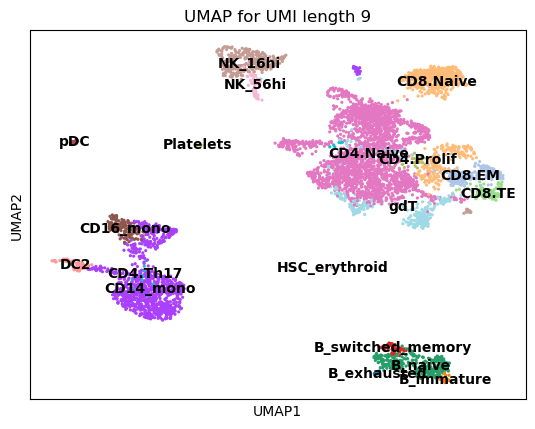

Processing UMI length: 10


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 10:
[[0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.5542477 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]]
Min: 0.0, Max: 8.521302889142168


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_10.h5ad



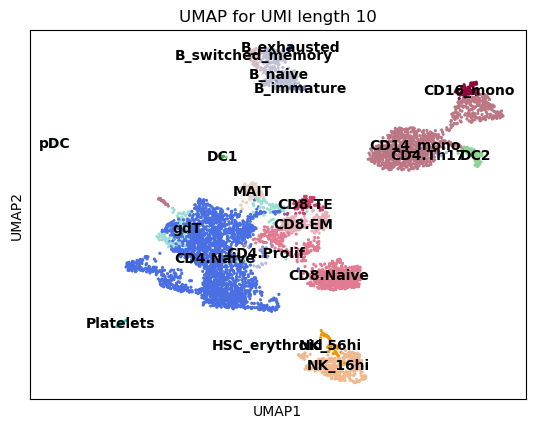

Processing UMI length: 11


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55409018 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.521730707389386


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_11.h5ad



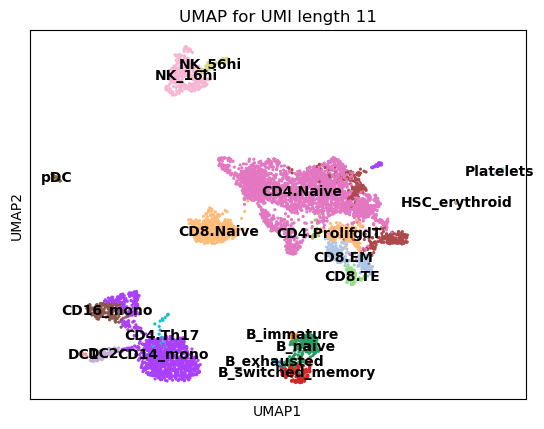

Processing UMI length: 12


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 12:
[[0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.5540272 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]]
Min: 0.0, Max: 8.522591452932469


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad



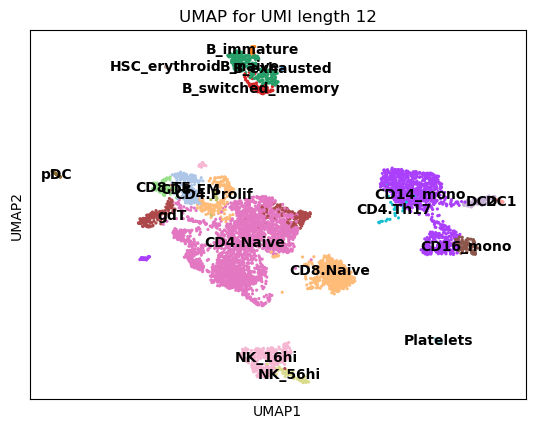

In [11]:
import scanpy as sc
import celltypist
import os

dataset= "5k_PBMCs"  # Change to "10k_PBMCs" if needed

common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"
# common_path = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices"
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_adata_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # Compute UMAP
    sc.tl.umap(annotated_adata)

    # Plot UMAP with majority voting labels
    sc.pl.umap(
        annotated_adata, 
        color=['majority_voting'], 
        legend_loc='on data', 
        title=f"UMAP for UMI length {i}", 
        show=True  # Display instead of saving
    )

#### Collision aware estimator 

In [12]:
import scanpy as sc
import celltypist
import os

dataset = "5k_PBMCs"  # Change to "10k_PBMCs" if needed
common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/col_aware_nunif_matrices" # 1k

# Define file paths
filepath = common_path
output_path = os.path.join(common_path, "cell_annotations")

# Load the CellTypist model
model = celltypist.models.Model.load(model='Healthy_COVID19_PBMC.pkl')

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Dictionary to store annotated data
annotated_adata_dict = {}

# Process each UMI length
for i in range(1, 13):
    print(f"Processing UMI length: {i}")
    
    # Load the h5ad file for the current UMI length
    adata = sc.read_h5ad(filepath + f"/adata_{i}.h5ad")
    
    # Normalize counts per cell to 10,000
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Apply log1p transformation
    sc.pp.log1p(adata)
    
    # Check matrix sample (optional)
    print(f"Sample of the matrix for UMI length {i}:")
    print(adata.X[:5, :5])
    print(f"Min: {adata.X.min()}, Max: {adata.X.max()}")
    
    # Annotate the cell types using the CellTypist model
    predictions = celltypist.annotate(adata, model=model, majority_voting=True)
    
    # Store annotated data
    annotated_adata = predictions.to_adata()
    annotated_adata_dict[i] = annotated_adata
    
    # Save annotated AnnData object
    annotated_output_path = os.path.join(output_path, f"annotated_inv_matrices/annotated_adata_{i}.h5ad")
    annotated_adata.write_h5ad(annotated_output_path)
    print(f"Annotated data saved to: {annotated_output_path}\n")

    # Compute UMAP
    # sc.tl.umap(annotated_adata)

    # # Plot UMAP with majority voting labels
    # sc.pl.umap(
    #     annotated_adata, 
    #     color=['majority_voting'], 
    #     legend_loc='on data', 
    #     title=f"UMAP for UMI length {i}(inverted)", 
    #     show=True  # Display instead of saving
    # )

Processing UMI length: 1


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 1:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.76585157 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 6.41284495282595


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_1.h5ad

Processing UMI length: 2


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 2:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.59800287 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 7.2208647215141735


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_2.h5ad

Processing UMI length: 3


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model
🧬 3430 features used for prediction


Sample of the matrix for UMI length 3:
[[0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.5736204 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]]
Min: 0.0, Max: 7.994448095622966


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_3.h5ad

Processing UMI length: 4


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model
🧬 3430 features used for prediction


Sample of the matrix for UMI length 4:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55517047 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.620245937336357


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_4.h5ad

Processing UMI length: 5


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model
🧬 3430 features used for prediction


Sample of the matrix for UMI length 5:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55460933 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.478018152813082


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_5.h5ad

Processing UMI length: 6


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 6:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55518857 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.508658968801544


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_6.h5ad

Processing UMI length: 7


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 7:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55470596 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.516083914189442


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_7.h5ad

Processing UMI length: 8


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 8:
[[0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.5544745 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]]
Min: 0.0, Max: 8.52033031196373


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_8.h5ad

Processing UMI length: 9


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 9:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55442022 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.520783908133366


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_9.h5ad

Processing UMI length: 10


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 10:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55422857 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.521613695410704


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_10.h5ad

Processing UMI length: 11


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model


Sample of the matrix for UMI length 11:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55407921 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.521812342765688


🧬 3430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_11.h5ad

Processing UMI length: 12


🔬 Input data has 5709 cells and 31131 genes
🔗 Matching reference genes in the model
🧬 3430 features used for prediction


Sample of the matrix for UMI length 12:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.55396217 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Min: 0.0, Max: 8.522630868298561


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Annotated data saved to: /data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/col_aware_nunif_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_12.h5ad



In [17]:
import pandas as pd
import scanpy as sc

labels_adata = sc.read_h5ad(
    "/data/dagyeman/cellranger/bam_file_analysis/5k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
)

# Get the "majority_voting" column
reference_labels = labels_adata.obs['majority_voting'].astype(str)

# Count number of cells per type
cell_counts = reference_labels.value_counts()

print(cell_counts)



majority_voting
CD4.Naive            2358
CD14_mono            1029
CD8.Naive             722
NK_16hi               328
gdT                   282
B_naive               280
CD8.EM                202
CD16_mono              93
CD8.TE                 77
DC2                    77
B_switched_memory      68
NK_56hi                59
pDC                    34
CD4.Th17               23
B_immature             21
Platelets              17
CD4.Prolif             16
B_exhausted            10
DC1                     7
HSC_erythroid           6
Name: count, dtype: int64


In [16]:
reference_labels

{'AAACCAAAGGTGACGA-1': 'CD4.Prolif',
 'AAACCCTGTGACGAGT-1': 'CD4.Naive',
 'AAACGAATCAGGCTAC-1': 'gdT',
 'AAACGACAGATTGACT-1': 'CD14_mono',
 'AAACGATGTCTTGAAC-1': 'CD4.Naive',
 'AAACGATGTGCGCGAA-1': 'B_naive',
 'AAACGATGTTAGCCCA-1': 'CD4.Naive',
 'AAACGATGTTCGATTA-1': 'CD16_mono',
 'AAACGCCTCATGTCTC-1': 'CD4.Naive',
 'AAACGGACATGATCCC-1': 'CD8.EM',
 'AAACGTAAGGTATGAA-1': 'gdT',
 'AAACGTCCACCTAATT-1': 'CD4.Naive',
 'AAACTCACAATTACAG-1': 'CD4.Naive',
 'AAACTCCGTATGTGGA-1': 'CD14_mono',
 'AAAGCAATCCGGGTAT-1': 'CD4.Naive',
 'AAAGCAATCCTTCGGC-1': 'CD16_mono',
 'AAAGCAATCGTTAAGT-1': 'CD4.Naive',
 'AAAGCATGTGAGGAGA-1': 'NK_16hi',
 'AAAGCATGTTCAAGGA-1': 'CD4.Naive',
 'AAAGCCAGTCAAGGCG-1': 'CD14_mono',
 'AAAGCCAGTTGGTAGA-1': 'CD16_mono',
 'AAAGCCTCACTATATC-1': 'CD4.Naive',
 'AAAGCTAAGCATGCAC-1': 'CD4.Naive',
 'AAAGCTAAGCCATCAA-1': 'NK_16hi',
 'AAAGCTAAGCGGTCCA-1': 'CD4.Naive',
 'AAAGCTAAGTCTAGCA-1': 'CD8.Naive',
 'AAAGGTTGTATAGCTC-1': 'CD4.Naive',
 'AAAGGTTGTATGGTGA-1': 'NK_16hi',
 'AAAGTAGTCACC